In [15]:
import requests
from bs4 import BeautifulSoup
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
partial_url = 'https://cbi.iq/currency_auction/view/'
ua1 = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) " \
      "Chrome/66.0.3359.139 Safari/537.36"
headers = {"User-Agent": ua1}

In [134]:
whole_url = partial_url + '124'

page = requests.get(whole_url, headers=headers, timeout=500)
soup = BeautifulSoup(page.content, "html.parser")

# soup.find_all('span', attrs={"style":"font-family:Arial,Helvetica,sans-serif"})[0:]
info = soup.find_all('span', attrs={"style":"font-family:Arial,Helvetica,sans-serif"})
info

[<span style="font-family:Arial,Helvetica,sans-serif"><span style="font-size:16px"><strong>إعلان رقم (3529)</strong></span></span>,
 <span style="font-family:Arial,Helvetica,sans-serif"><span style="font-size:14px"><strong>تـاريخ البيع</strong> - الثلاثاء 19-9-2017 والمنفذ يوم الاثنين 18-9-2017</span></span>,
 <span style="font-family:Arial,Helvetica,sans-serif"><strong>التفاصيل</strong> </span>,
 <span style="font-family:Arial,Helvetica,sans-serif"><strong>المبلغ</strong></span>,
 <span style="font-family:Arial,Helvetica,sans-serif">اجمالي البيع لأغراض تعزيز الارصدة في الخارج (حوالات،إعتمادات)</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">118,812,407</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">اجمالي البيع النقدي</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">2,160,000</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">اجمالي المبيعات الكلية</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">162,772,407</span>,
 <s

In [135]:
data = [i.text for i in info]
print(data[1])
print(data[5])
print(data[7])
print(data[9])
print(data[-3])

تـاريخ البيع - الثلاثاء 19-9-2017 والمنفذ يوم الاثنين 18-9-2017
118,812,407
2,160,000
162,772,407
سعر بيع المبالغ المحولة لحسابات المصارف في الخارج (1190) دينار لكل دولار.


### URLs 124 - 394

#### Function to scrape and save (run in separate .py file)

In [128]:
# establish df outside the for loop

def scraper_124_394():
    df = pd.DataFrame(columns=['date', 'total_for_foreign',
                               'total_cash', 'grand_total', 'exchange_rate'])
    for page in range(124, 395):

        # piece together each unique URL
        whole_url = partial_url + str(page)
        print(whole_url)
        try:
            page = requests.get(whole_url, headers=headers, timeout=500)
            soup = BeautifulSoup(page.content, "html.parser")

            info = soup.find_all(
                'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})
            # put data into a list
            data = [i.text for i in info]
            df = df.append({'date': data[1],
                            'total_for_foreign': data[5],
                            'total_cash': data[7],
                            'grand_total': data[9],
                            'exchange_rate': data[-3],
                            'url':whole_url}, ignore_index=True)
        except Exception:
            print('No URL at that number')

        time.sleep(1.2)
    df.to_csv('124_394.csv',index=False)
    return df

In [129]:
!ls

124_394.csv       README.md         scraper124394.py
CBI_Project.ipynb initial_df.csv


In [60]:
raw_data = pd.read_csv('initial_df.csv',index_col=False)

In [69]:
raw_data.iloc[4:6,4]

4    سعر بيع المبالغ المحولة لحسابات المصارف في الخ...
5    سعر بيع المبالغ المحولة لحسابات المصارف في الخ...
Name: exchange_rate, dtype: object

In [130]:
raw_data.iloc[250:270,:]

,date,total_for_foreign,total_cash,grand_total,exchange_rate
250,تـاريخ البيع - ليوم الخميس 2018/9/6 والمنفذ يو...,"168,404,815","31,100,000",اجمالي المبيعات الكلية,علماً أن :
251,تـاريخ البيع - ليوم الاحد 2018/9/9 والمنفذ يوم...,"165,241,119","33,050,000\r\n","198,291,119",علماً أن :
252,تـاريخ البيع - ليوم الاثنين 2018/9/10 والمنفذ ...,"169,998,910","37,350,000\r\n","207,348,910",علماً أن :
253,تـاريخ البيع - ليوم الثلاثاء 2018/9/11 والمنفذ...,"161,015,027","34,350,000\r\n","195,365,027",علماً أن :
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000\r\n","209,521,480",علماً أن :
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :
259,3789,الـمبلغ,"190,058,455","35,900,000 \r\n",علماً أن :


#### Cleaning 124-394

In [3]:
raw_data1 = pd.read_csv('124_394.csv')

In [4]:
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393
259,3789,الـمبلغ,"190,058,455","35,900,000 \r\n",علماً أن :,https://cbi.iq/currency_auction/view/394


In [5]:
# chop off last row
raw_data1 = raw_data1.iloc[:259,]

In [6]:
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000\r\n","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [7]:
# strip new lines
raw_data1['total_for_foreign'] = raw_data1['total_for_foreign'].str.strip()
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000\r\n","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [8]:
raw_data1['total_cash'] = raw_data1['total_cash'].str.strip()
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [9]:
raw_data1['grand_total'] = raw_data1['grand_total'].str.strip()
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [10]:
# now to remove the commas and convert to int
raw_data1['total_for_foreign'] = raw_data1.total_for_foreign.str.replace(',','')
raw_data1['total_for_foreign'] = pd.to_numeric(raw_data1.total_for_foreign,errors='coerce')

In [11]:
raw_data1['total_cash'] = pd.to_numeric(raw_data1.total_cash.str.replace(',',''), errors='coerce')

In [12]:
raw_data1['grand_total'] = pd.to_numeric(raw_data1.grand_total.str.replace(',',''), errors='coerce')

raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
date                 259 non-null object
total_for_foreign    254 non-null float64
total_cash           254 non-null float64
grand_total          232 non-null float64
exchange_rate        259 non-null object
url                  259 non-null object
dtypes: float64(3), object(3)
memory usage: 12.2+ KB


In [13]:
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,174421480.0,35100000.0,209521480.0,علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,156902584.0,30800000.0,187702584.0,علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,182569754.0,32350000.0,214919754.0,علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,147381019.0,38000000.0,185381019.0,علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,104937400.0,32250000.0,137187400.0,علماً أن :,https://cbi.iq/currency_auction/view/393


In [22]:
# output CSV with cleaned columns
raw_data1.to_csv('range1_cleaned.csv',index=False)

### Determining next range

In [25]:
# Starts at 394, but doesn't go all the way to 643.
# In fact, appears to change multiple times between 394 and 643

for page in range(394, 395):
    print('page {}'.format(page))
    # piece together each unique URL
    whole_url = partial_url + str(page)
    print(whole_url)

    page = requests.get(whole_url, headers=headers, timeout=500)
    soup = BeautifulSoup(page.content, "html.parser")

    info = soup.find_all(
        'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})

    data = [i.text for i in info]

    time.sleep(0.5)

page 394
https://cbi.iq/currency_auction/view/394


In [27]:
print(data)

['إعلان رقم (', '3789', ')', 'تـاريخ البيع - ليوم الأربعاء 2018/9/19 والمنفذ يوم الثلاثاء 2018/9/18\xa0 ', 'التفاصيل ', '    الـمبلغ', 'اجمالي البيع لأغراض تعزيز الارصدة في الخارج (حوالات،إعتمادات)', '190,058,455', 'اجمالي البيع النقدي', '35,900,000 \r\n', 'اجمالي المبيعات الكلية', ' 225,958,455', 'علماً أن :', 'سعر بيع المبالغ المحولة لحسابات المصارف في الخارج (1190)\xa0دينار لكل دولار.', 'سعر البيع النقدي (1190)\xa0دينارلكل دولار.']


In [41]:
# get date    
print(data[3])
# get total_for_foreign
print(data[7])
# # get total_cash
print(data[9])
# # get grand_total
print(data[11])
# # get exchange_rate
print(data[14])

تـاريخ البيع - ليوم الأربعاء 2018/9/19 والمنفذ يوم الثلاثاء 2018/9/18  
190,058,455
35,900,000 

 225,958,455
سعر البيع النقدي (1190) دينارلكل دولار.


In [45]:
n = 494
for page in range(n, n+10):
    print('page {}'.format(page))
    # piece together each unique URL
    whole_url = partial_url + str(page)
    print(whole_url)

    page = requests.get(whole_url, headers=headers, timeout=500)
    soup = BeautifulSoup(page.content, "html.parser")

    info = soup.find_all(
        'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})

    data = [i.text for i in info]

    time.sleep(0.5)


    # get date    
    print(data[3])
    # get total_for_foreign
    print(data[7])
    # # get total_cash
    print(data[9])
    # # get grand_total
    print(data[11])
    # # get exchange_rate
    print(data[14])

page 494
https://cbi.iq/currency_auction/view/494
تـاريخ البيع - ليوم الأربعاء 2019/2/6 والمنفذ يوم الثلاثاء 2019/2/5  
120,429,996
25,440,000
145,869,996
سعر البيع النقدي (1190) دينارلكل دولار.
page 495
https://cbi.iq/currency_auction/view/495
تـاريخ البيع - ليوم الخميس 2019/2/7 والمنفذ يوم الأربعاء 2019/2/6  
115,199,380
18,110,000
133,309,380
سعر البيع النقدي (1190) دينارلكل دولار.
page 496
https://cbi.iq/currency_auction/view/496
تـاريخ البيع - ليوم الاحد 2019/2/10 والمنفذ يوم الخميس 2019/2/7  
117,261,040
19,690,000
136,951,040
سعر البيع النقدي (1190) دينارلكل دولار.
page 497
https://cbi.iq/currency_auction/view/497
تـاريخ البيع - ليوم الأثنين 2019/2/11 والمنفذ يوم الأحد 2019/2/10  
131,618,629
26,750,000
158,368,629
سعر البيع النقدي (1190) دينارلكل دولار.
page 498
https://cbi.iq/currency_auction/view/498
تـاريخ البيع - ليوم الثلاثاء 2019/2/12 والمنفذ يوم الأثنين 2019/2/11  
122,956,661
24,000,000
146,956,661
سعر البيع النقدي (1190) دينارلكل دولار.
page 499
https://cbi.iq/currency

In [48]:
n = 620
for page in range(n, n+20,2):
    print('page {}'.format(page))
    # piece together each unique URL
    whole_url = partial_url + str(page)
    print(whole_url)

    page = requests.get(whole_url, headers=headers, timeout=500)
    soup = BeautifulSoup(page.content, "html.parser")

    info = soup.find_all(
        'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})

    data = [i.text for i in info]

    time.sleep(0.5)


    # get date    
    print(data[3])
    # get total_for_foreign
    print(data[7])
    # # get total_cash
    print(data[9])
    # # get grand_total
    print(data[11])
    # # get exchange_rate
    print(data[14])

page 620
https://cbi.iq/currency_auction/view/620
تـاريخ البيع - ليوم الأثنين 2019/8/5 والمنفذ يوم الأحد 2019/8/4  
199,459,242
28,360,000
227,819,242
سعر البيع النقدي (1190) دينارلكل دولار.
page 622
https://cbi.iq/currency_auction/view/622
تـاريخ البيع - ليوم الأربعاء 2019/8/7 والمنفذ يوم الثلاثاء 2019/8/6  
204,386,646
22,760,000
227,146,646
سعر البيع النقدي (1190) دينارلكل دولار.
page 624
https://cbi.iq/currency_auction/view/624
تـاريخ البيع - ليوم الأحد 2019/8/18 والمنفذ يوم الخميس 2019/8/8  
135,880,500
19,290,000
155,170,500
سعر البيع النقدي (1190) دينارلكل دولار.
page 626
https://cbi.iq/currency_auction/view/626
تـاريخ البيع - ليوم الثلاثاء 2019/8/20 والمنفذ يوم الأثنين 2019/8/19  
143,473,309
20,180,000
163,653,309
سعر البيع النقدي (1190) دينارلكل دولار.
page 628
https://cbi.iq/currency_auction/view/628
تـاريخ البيع - ليوم الخميس 2019/8/22 والمنفذ يوم الأربعاء 2019/8/21  
187,149,922
24,470,000
211,619,922
سعر البيع النقدي (1190) دينارلكل دولار.
page 630
https://cbi.iq/currency

Determination was that the range from 394 to 643 had a few gaps, but was otherwise standard

In [49]:
!ls

124_394.csv        CBI_Project.ipynb  range1_cleaned.csv scraper_range2.py
394_643.csv        README.md          scraper124394.py


#### Cleaning 394-643

In [54]:
raw_data2 = pd.read_csv('394_643.csv')
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
date                 248 non-null object
total_for_foreign    248 non-null object
total_cash           248 non-null object
grand_total          248 non-null object
exchange_rate        248 non-null object
url                  248 non-null object
dtypes: object(6)
memory usage: 11.7+ KB


In [59]:
raw_data2['total_for_foreign'] = raw_data2['total_for_foreign'].str.strip()
raw_data2['total_cash'] = raw_data2['total_cash'].str.strip()
raw_data2['grand_total'] = raw_data2['grand_total'].str.strip()

In [60]:
raw_data2.head()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
0,تـاريخ البيع - ليوم الأربعاء 2018/9/19 والمنفذ...,"190,058,455","35,900,000","225,958,455",سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/394
1,تـاريخ البيع - ليوم الخميس 2018/9/20 والمنفذ ي...,"166,793,767","31,800,000","198,593,767",سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/395
2,تـاريخ البيع - ليوم الأحد 2018/9/23 والمنفذ يو...,"175,348,374","32,900,000",,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/396
3,تـاريخ البيع - ليوم الأثنين 2018/9/24 والمنفذ ...,"174,865,770","38,200,000","213,065,770",سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/397
4,تـاريخ البيع - ليوم الثلاثاء 2018/9/25 والمنفذ...,"167,674,850","34,450,000","202,124,850",سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/398


In [61]:
# now remove commas and convert to float
raw_data2['total_for_foreign'] = pd.to_numeric(raw_data2.total_for_foreign.str.replace(',',''), errors='coerce')

In [62]:
raw_data2['total_cash'] = pd.to_numeric(raw_data2.total_cash.str.replace(',',''), errors='coerce')
raw_data2['grand_total'] = pd.to_numeric(raw_data2.grand_total.str.replace(',',''), errors='coerce')

In [63]:
raw_data2.head()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
0,تـاريخ البيع - ليوم الأربعاء 2018/9/19 والمنفذ...,190058455.0,35900000.0,225958455.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/394
1,تـاريخ البيع - ليوم الخميس 2018/9/20 والمنفذ ي...,166793767.0,31800000.0,198593767.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/395
2,تـاريخ البيع - ليوم الأحد 2018/9/23 والمنفذ يو...,175348374.0,32900000.0,NaN,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/396
3,تـاريخ البيع - ليوم الأثنين 2018/9/24 والمنفذ ...,174865770.0,38200000.0,213065770.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/397
4,تـاريخ البيع - ليوم الثلاثاء 2018/9/25 والمنفذ...,167674850.0,34450000.0,202124850.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/398


In [64]:
# save to csv
raw_data2.to_csv('range2_cleaned.csv',index=False)

##### Combine both dfs

In [65]:
range1_df = pd.read_csv('range1_cleaned.csv')
range2_df = pd.read_csv('range2_cleaned.csv')

In [66]:
print(range1_df.columns)
print(range2_df.columns)

Index(['date', 'total_for_foreign', 'total_cash', 'grand_total',
       'exchange_rate', 'url'],
      dtype='object')
Index(['date', 'total_for_foreign', 'total_cash', 'grand_total',
       'exchange_rate', 'url'],
      dtype='object')


In [67]:
print(range1_df.info())
print(range2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
date                 259 non-null object
total_for_foreign    254 non-null float64
total_cash           254 non-null float64
grand_total          232 non-null float64
exchange_rate        259 non-null object
url                  259 non-null object
dtypes: float64(3), object(3)
memory usage: 12.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
date                 248 non-null object
total_for_foreign    246 non-null float64
total_cash           246 non-null float64
grand_total          179 non-null float64
exchange_rate        248 non-null object
url                  248 non-null object
dtypes: float64(3), object(3)
memory usage: 11.7+ KB
None


In [73]:
combined_df = range1_df.append(range2_df,ignore_index=True)

In [74]:
combined_df.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
502,تـاريخ البيع - ليوم الأحد 2019/9/8 والمنفذ يوم...,195326397.0,18210000.0,213536397.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/639
503,تـاريخ البيع - ليوم الأثنين 2019/9/9 والمنفذ ي...,225907675.0,32720000.0,258627675.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/640
504,تـاريخ البيع - ليوم الأربعاء 2019/9/11 والمنفذ...,221015860.0,30230000.0,251245860.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/641
505,تـاريخ البيع - ليوم الخميس 2019/9/12 والمنفذ ي...,231588396.0,26550000.0,258138396.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/642
506,تـاريخ البيع - ليوم الأحد 2019/9/15 والمنفذ يو...,224964314.0,20220000.0,245184314.0,سعر البيع النقدي (1190) دينارلكل دولار.,https://cbi.iq/currency_auction/view/643


In [77]:
combined_df.head()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
0,تـاريخ البيع - الثلاثاء 19-9-2017 والمنفذ يوم ...,118812407.0,2160000.0,162772407.0,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/124
1,تـاريخ البيع - الاربعاء 20-9-2017 والمنفذ يوم ...,128664984.0,810000.0,163974984.0,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/125
2,تـاريخ البيع - الخميس 21-9-2017 والمنفذ يوم ال...,145291507.0,16950000.0,162241507.0,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/126
3,تـاريخ البيع - الاحد 24-9-2017,111966241.0,41260000.0,153226241.0,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/127
4,تـاريخ البيع - الاثنين 25-9-2017 والمنفذ يوم ا...,113115408.0,40020000.0,153135408.0,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/128


In [78]:
combined_df.to_csv('combined_data.csv',index=False)

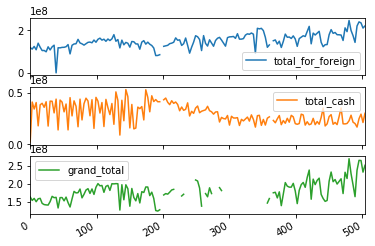

In [76]:
combined_df[['total_for_foreign','total_cash','grand_total']][::3].plot(subplots=True)
plt.show()

In [96]:
combined_df.date[:30]

0     تـاريخ البيع - الثلاثاء 19-9-2017 والمنفذ يوم ...
1     تـاريخ البيع - الاربعاء 20-9-2017 والمنفذ يوم ...
2     تـاريخ البيع - الخميس 21-9-2017 والمنفذ يوم ال...
3                        تـاريخ البيع - الاحد 24-9-2017
4     تـاريخ البيع - الاثنين 25-9-2017 والمنفذ يوم ا...
5     تـاريخ البيع - الثلاثاء 26-9-2017 والمنفذ يوم ...
6     تـاريخ البيع - الاربعاء 27-9-2017 والمنفذ يوم ...
7     تـاريخ البيع - الخميس 28-9-2017 والمنفذ يوم ال...
8     تـاريخ البيع - الأحد 1-10-2017 والمنفذ يوم الخ...
9                      تـاريخ البيع - الأثنين 2-10-2017
10    تـاريخ البيع - الثلاثاء 3-10-2017 والمنفذ يوم ...
11    تـاريخ البيع - الأربعاء 4-10-2017 والمنفذ يوم ...
12    تـاريخ البيع - الخميس 5-10-2017 والمنفذ يوم ال...
13    تـاريخ البيع - الاحد 8-10-2017 والمنفذ يوم الخ...
14    تـاريخ البيع - الأثنين 9-10-2017 والمنفذ يوم ا...
15    تـاريخ البيع - الثلاثاء 10-10-2017 والمنفذ يوم...
16    تـاريخ البيع - الأربعاء 11-10-2017 والمنفذ يوم...
17    تـاريخ البيع - الخميس 12-10-2017 والمنفذ ي

In [98]:
combined_df.date[:10].str.contains('....-.*-.*', regex=True)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: date, dtype: bool

In [101]:
combined_df.date[:10].str.extract(pat='(....-.*-.*)')

,0
0,بيع - الثلاثاء 19-9-2017 والمنفذ يوم الاثنين 1...
1,بيع - الاربعاء 20-9-2017 والمنفذ يوم الثلاثاء ...
2,بيع - الخميس 21-9-2017 والمنفذ يوم الاربعاء 20...
3,بيع - الاحد 24-9-2017
4,بيع - الاثنين 25-9-2017 والمنفذ يوم الاحد 24-9...
5,بيع - الثلاثاء 26-9-2017 والمنفذ يوم الاثنين 2...
6,بيع - الاربعاء 27-9-2017 والمنفذ يوم الثلاثاء ...
7,بيع - الخميس 28-9-2017 والمنفذ يوم الاربعاء 27...
8,بيع - الأحد 1-10-2017 والمنفذ يوم الخميس 28-9-...
9,بيع - الأثنين 2-10-2017


In [135]:
import re
r = re.compile("\d{1,2}-\d{1,2}-\d{1,4}")
def match(x):
    m = r.search(x)
    if m:
        return m.group()
    return ""

In [126]:
s[22:39]

'ء 19-9-2017 والمن'

In [133]:
# combined_df.date.str.extract(r"(\d{4}-\d{1-2}-\d{1-2})")
s = combined_df.date.loc[0]
match = re.search('\d{1,2}-\d{1,2}-\d{1,4}',s)
print(match)

<re.Match object; span=(24, 33), match='19-9-2017'>


In [134]:
match.group()

'19-9-2017'

In [143]:
combined_df.date.str.extract('(\d{1,2}-\d{1,2}-\d{1,4})',expand=True)[:5]

,0
0,19-9-2017
1,20-9-2017
2,21-9-2017
3,24-9-2017
4,25-9-2017


In [144]:
combined_df.date.tail()

502    تـاريخ البيع - ليوم الأحد 2019/9/8 والمنفذ يوم...
503    تـاريخ البيع - ليوم الأثنين 2019/9/9 والمنفذ ي...
504    تـاريخ البيع - ليوم الأربعاء 2019/9/11 والمنفذ...
505    تـاريخ البيع - ليوم الخميس 2019/9/12 والمنفذ ي...
506    تـاريخ البيع - ليوم الأحد 2019/9/15 والمنفذ يو...
Name: date, dtype: object

In [146]:
combined_df['date'] = combined_df.date.str.replace('/','-')

In [147]:
combined_df.date.tail()

502    تـاريخ البيع - ليوم الأحد 2019-9-8 والمنفذ يوم...
503    تـاريخ البيع - ليوم الأثنين 2019-9-9 والمنفذ ي...
504    تـاريخ البيع - ليوم الأربعاء 2019-9-11 والمنفذ...
505    تـاريخ البيع - ليوم الخميس 2019-9-12 والمنفذ ي...
506    تـاريخ البيع - ليوم الأحد 2019-9-15 والمنفذ يو...
Name: date, dtype: object

In [150]:
test = combined_df.date.str.extract('(\d{1,4}-\d{1,2}-\d{1,4})',expand=True)[500:]

In [160]:
import plotly.graph_objects as go
import plotly.express as px

In [162]:
graph_data_1 = combined_df.total_for_foreign

In [195]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.total_for_foreign,
                        mode='lines',
                        name='total for foreign'))
# fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.total_cash,
#                         mode='lines',
#                         name='total cash'))
# fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.grand_total,
#                         mode='lines',
#                         name='grand total'))
fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.total_for_foreign.rolling(15, win_type='triang').mean(),
                        mode='lines',
                        name='foreign total rolling avg'))

fig.update_xaxes(showticklabels=False)
fig.update_layout(
    shapes=[
        go.layout.Shape(
            type='line',
            x0=100,
            y0=-30000000,
            x1=100,
            y1=300000000,
            line=dict(
                color="black",
                width=3
            ),
            name='Snapback'
        )
    ]
)


fig.show()